In [1]:


import numpy as np
import pandas as pd
import numpy_ext as npext

In [2]:
from numpy.ma import cumsum


from model.calculate_features import CalculateFeatures

dtypes = {'Magnitude': np.float64, 'Latitude': np.float64, 'Longitude': np.float64, 'Depth': np.float64}
df = pd.read_csv('../../data/DATA_2_2017.csv', delimiter=',', dtype=dtypes,parse_dates=["Datetime"],date_parser=np.datetime64)

In [3]:
df=df[-200:].reset_index()
df

,index,Magnitude,Latitude,Longitude,Depth,Datetime
0,40642,3.8,17.01,-95.84,50.0,2021-05-18 10:25:06
1,40643,3.8,19.36,-103.89,51.0,2021-05-18 10:37:07
2,40644,3.9,16.45,-95.16,56.0,2021-05-18 11:17:23
3,40645,4.0,15.82,-94.21,81.0,2021-05-18 11:46:12
4,40646,3.8,16.18,-94.03,107.0,2021-05-18 13:03:22
...,...,...,...,...,...,...
195,40837,3.9,16.81,-100.96,12.0,2021-05-29 14:15:02
196,40838,4.2,16.78,-100.89,15.0,2021-05-29 16:09:39
197,40839,3.8,32.10,-115.08,15.0,2021-05-29 18:26:41
198,40840,3.9,15.87,-94.71,15.0,2021-05-29 19:54:14


In [4]:
df_greater_than_5=df[df.Magnitude >= 5].index
df_lesser_than_5=df[df.Magnitude < 5].index
len(df_greater_than_5)/len(df_lesser_than_5)*100

0.0

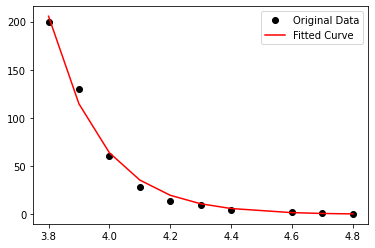

In [5]:
a=CalculateFeatures(df,50)

In [6]:
a.b

2.5348985192072244

In [7]:
a.features

,old_index,firstT,lastT,meanMag,a,b,elapsedT,rateSqrtEnergy,meanTDiff,maxMag,zSeismicRateChange,bSeismicRateChange,last7dMaxMag,next14dMaxMag
1,50,2021-05-18 10:37:07,2021-05-21 23:14:38,3.948,9.920047,2.160948,304651,123974.872133,6217.367347,4.4,856.562899,190.693680,4.4,4.8
2,51,2021-05-18 11:17:23,2021-05-21 23:31:06,3.952,9.762965,2.118886,303223,125323.790345,6188.224490,4.4,267.207784,-18.114726,4.4,4.8
3,52,2021-05-18 11:46:12,2021-05-21 23:56:00,3.952,9.762965,2.118886,302988,125420.992513,6183.428571,4.4,108.397417,-2.987962,4.4,4.8
4,53,2021-05-18 13:03:22,2021-05-22 01:46:58,3.948,9.920047,2.160948,305016,123826.516544,6224.816327,4.4,318.433667,25.793582,4.4,4.8
5,54,2021-05-18 15:32:53,2021-05-22 03:36:37,3.954,9.653166,2.090125,302624,126066.631600,6176.000000,4.4,345.832329,-30.326213,4.4,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,194,2021-05-27 09:34:35,2021-05-29 13:59:14,3.900,12.693612,2.890790,188679,180717.102881,3850.591837,4.3,255.734237,21.154938,4.7,4.3
146,195,2021-05-27 10:51:45,2021-05-29 14:15:02,3.902,12.553417,2.853407,184997,184886.916257,3775.448980,4.3,429.068759,-59.359471,4.7,4.3
147,196,2021-05-27 11:09:51,2021-05-29 16:09:39,3.906,12.286362,2.783464,190788,180992.594222,3893.632653,4.3,538.098504,94.237313,4.7,4.3
148,197,2021-05-27 14:42:26,2021-05-29 18:26:41,3.902,12.611684,2.869527,186255,184151.986024,3801.122449,4.3,476.077725,-72.676883,4.7,4.3


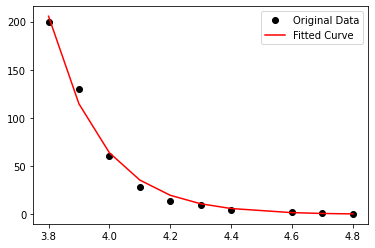

AttributeError: 'numpy.ndarray' object has no attribute 'mapped_mag'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

GRC = CalculateFeatures.gutenberg_richter_curve_fit(df.Magnitude)
x=GRC.mapped_mag[:,0]
y=GRC.mapped_mag[:,1]
plt.figure()
plt.plot(x, y, 'ko', label="Original Data")
plt.plot(x, GRC.gutenberg_richter_law(x,GRC.a,GRC.b), 'r-', label="Fitted Curve")
plt.legend()
plt.show()